# Predicción con el conjunto de datos cifar 100 (RGB)

### Importar librerías

In [1]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

### Cargar los datos

In [2]:
(X_train,y_train),(X_test,y_test) = cifar100.load_data(label_mode="fine")

169001437/169001437 [==============================] - 17s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
num_ima_ent = X_train.shape[0]
num_ima_pru = X_test.shape[0]
alt_ima = X_train.shape[1]
anc_ima = X_train.shape[2]

print("Dimensiones, entrenamiento:"
      + str(X_train.shape)+", prueba:"+str(X_test.shape))
print("Cantidad de imagenes de entrenamiento: " + str(num_ima_ent))
print("Cantidad de imagenes de prueba: " + str(num_ima_pru))
print("Altura de las imagenes: " + str(alt_ima))
print("Ancho de las imagenes: " + str(anc_ima))

Dimensiones, entrenamiento:(50000, 32, 32, 3), prueba:(10000, 32, 32, 3)
Cantidad de imagenes de entrenamiento: 50000
Cantidad de imagenes de prueba: 10000
Altura de las imagenes: 32
Ancho de las imagenes: 32


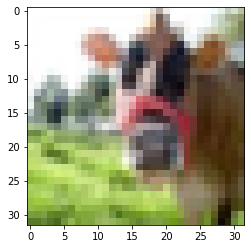

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

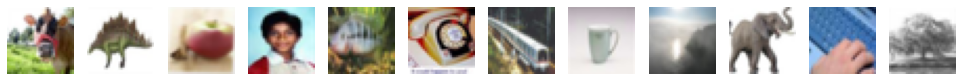

In [8]:
fig, axs = plt.subplots(1,12,figsize=(17,6))
for i in range(12):
  axs[i].imshow(X_train[i])
  axs[i].axis('off')

In [9]:
y_train[0:12]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31],
       [39],
       [96]])

### Preparación de datos

In [10]:
from keras.utils import np_utils

In [11]:
X_train = X_train.reshape(num_ima_ent,alt_ima*anc_ima*3).astype('float32')
X_test = X_test.reshape(num_ima_pru,alt_ima*anc_ima*3).astype('float32')

In [12]:
X_train.shape

(50000, 3072)

In [13]:
X_train[0]

array([255., 255., 255., ..., 138., 173.,  79.], dtype=float32)

In [14]:
print("Dimensiones, entrenamiento:"
      + str(X_train.shape)+", prueba:"+str(X_test.shape))

Dimensiones, entrenamiento:(50000, 3072), prueba:(10000, 3072)


Los valores están entre 0 y 255, los transformamos a valores entre 0 y 1 al dividir cada uno de ellos por 255

In [15]:
X_train = X_train/255.0
X_test = X_test/255.0

In [16]:
X_train[0]

array([1.        , 1.        , 1.        , ..., 0.5411765 , 0.6784314 ,
       0.30980393], dtype=float32)

Se tiene una única salida con valores entre 0 y 99 para representar las 100 clases, tranformamos la única salida en 100 salidas

In [17]:
from keras.utils import to_categorical

In [18]:
y_train[0]

array([19])

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_test = to_categorical(y_test)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
print("Dimensión de y_train transformado: "+
      str(y_train.shape))
print("Dimensión de y_test transformado: "+
      str(y_test.shape))
print("Número de clases: "+str(y_train.shape[1]))

Dimensión de y_train transformado: (50000, 100)
Dimensión de y_test transformado: (10000, 100)
Número de clases: 100


### Primer Modelo de Deep Learning

Importamos las librerías

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Modelo de Deep Learning

In [24]:
modelo1 = Sequential()

In [25]:
modelo1.add(Dense(1000,input_dim=alt_ima*anc_ima*3,activation='relu'))
modelo1.add(Dropout(0.3))
modelo1.add(Dense(100,activation='softmax'))
print(modelo1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               100100    
                                                                 
Total params: 3,173,100
Trainable params: 3,173,100
Non-trainable params: 0
_________________________________________________________________
None


Compilar el modelo

In [26]:
modelo1.compile(loss='categorical_crossentropy',optimizer='adam',
                metrics=['accuracy'])

Entrenar el modelo

In [27]:
historia = modelo1.fit(X_train,y_train,validation_data=(X_test,y_test),
            epochs=40,batch_size=256,verbose=0)

Graficar la historia

In [28]:
# Función para graficar la historia
EPOCAS = 40
import numpy as np
def graficar(h):
  LOSS = 0; ACCURACY = 1
  entrenamiento = np.zeros((2,EPOCAS));
  prueba = np.zeros((2,EPOCAS));
  entrenamiento[LOSS] = h.history['loss'] # loss de entrenamiento
  prueba[LOSS] = h.history['val_loss']    # loss de validación
  entrenamiento[ACCURACY] = h.history['accuracy'] #acc de entrenamiento
  prueba[ACCURACY] = h.history['val_accuracy'] #acc de validación

  epocas = range(1,EPOCAS+1)
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  for i, label in zip((LOSS,ACCURACY),('perdida','exactitud')):
    axs[i].plot(epocas,entrenamiento[i],'b-',label='Entrenamiento '+label)
    axs[i].plot(epocas,prueba[i],'y-',label='Prueba '+label)
    axs[i].set_title('Entrenamiento y prueba ' + label)
    axs[i].set_xlabel('Epocas')
    axs[i].set_ylabel(label)
    axs[i].legend()
  plt.show()

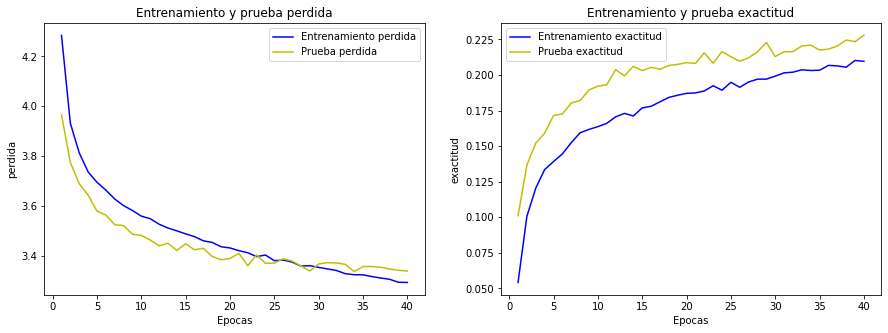

In [29]:
graficar(historia)

### Otro modelo de Deep Learning

Crear el modelo

In [31]:
modelo2 = Sequential()

In [32]:
modelo2.add(Dense(1000,input_dim=alt_ima*anc_ima*3,activation='relu'))
modelo2.add(Dense(200,activation='relu'))
modelo2.add(Dropout(0.40))
modelo2.add(Dense(100,activation='softmax'))
print(modelo2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              3073000   
                                                                 
 dense_3 (Dense)             (None, 200)               200200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
Total params: 3,293,300
Trainable params: 3,293,300
Non-trainable params: 0
_________________________________________________________________
None


Compilar el modelo

In [33]:
modelo2.compile(loss='categorical_crossentropy',optimizer='adam',
                metrics=['accuracy'])

Entrenar el modelo

In [34]:
historia={}
historia = modelo2.fit(X_train,y_train,validation_data=(X_test,y_test),
            epochs=40,batch_size=256,verbose=0)

Graficar la historia

In [35]:
# Función para graficar la historia
EPOCAS = 40
import numpy as np
def graficar(h):
  LOSS = 0; ACCURACY = 1
  entrenamiento = np.zeros((2,EPOCAS));
  prueba = np.zeros((2,EPOCAS));
  entrenamiento[LOSS] = h.history['loss'] # loss de entrenamiento
  prueba[LOSS] = h.history['val_loss']    # loss de validación
  entrenamiento[ACCURACY] = h.history['accuracy'] #acc de entrenamiento
  prueba[ACCURACY] = h.history['val_accuracy'] #acc de validación

  epocas = range(1,EPOCAS+1)
  fig, axs = plt.subplots(1,2,figsize=(15,5))
  for i, label in zip((LOSS,ACCURACY),('perdida','exactitud')):
    axs[i].plot(epocas,entrenamiento[i],'b-',label='Entrenamiento '+label)
    axs[i].plot(epocas,prueba[i],'y-',label='Prueba '+label)
    axs[i].set_title('Entrenamiento y prueba ' + label)
    axs[i].set_xlabel('Epocas')
    axs[i].set_ylabel(label)
    axs[i].legend()
  plt.show()

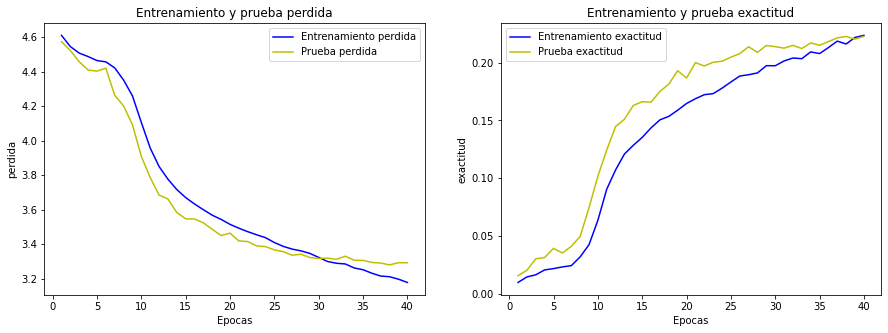

In [36]:
graficar(historia)